In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from arc import *
from time import time
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from typing import List, Dict
import gc

from basics import *
from utility import *
from floquet_hamiltonian import *


pi=np.pi
tau=2*pi

In [25]:
basis = None
levels = None
basis_n = None

energies = None
eigenstates = None
# Computational Parameters
t_level = RydStateFS(52,1,3/2)
max_det = tau*30e9  # radians/s
dl = 2
n_max = 2

comp = {
    "max_det": max_det,
    "dl": dl,
    "n_max": n_max
}

In [26]:
# Physical Parameters
Edc = 0  # V/m
Eac = 0 # 19.5  # V/m
ellipticity = 0.0
energy_bands = ellipticity > 1e-3  # TODO, choose a nice threshold for this
field_omega = tau*4.780e9  #radians/s
#field_omega = tau*(5.25e9)  #radians/s
theta = 0.0*pi/2  # angle between quantization axis and electric field (radians)

Eac_list = None
Edc_list = None
ellip_list = None
theta_list = None

fields = {
    "Eac": Eac,
    "ellipticity": ellipticity,
    "field_omega": field_omega,
    "Edc": Edc,
    "theta": theta
}

#Edc_list = np.linspace(0,30,200)  # V/m
Eac_list = np.linspace(0,100,150)  # V/m
#ellip_list = np.linspace(0,np.sqrt(0.07),100)**2
#theta_list = np.linspace(0,pi,100)

if Edc_list is not None:
    varied = ("Edc", Edc_list)
elif Eac_list is not None:
    varied = ("Eac", Eac_list)
elif ellip_list is not None:
    varied = ("ellipticity", ellip_list)
elif theta_list is not None:
    varied = ("theta", theta_list)
    
dataset=60
if dataset == 60:
# measured resonance between nP3/2 -> nD3/2 levels
    p3o2_d3o2_res = 4839*1e6*tau
# for 685nm at +80MHz wrt 4-6' transition. Generator at 191.25MHz
elif dataset == 80:
    p3o2_d3o2_res = 4840*1e6*tau
# effective laser induced AC stark shift
laser_dAC = detuning(RydStateFS(51,2,3/2), t_level, p3o2_d3o2_res)

In [27]:
try:
    energies = None
    eigenstates = None
except NameError:
    pass
if basis is None or levels is None:
    levels, basis = build_basis(t_level,max_det,single_side=False, dl=dl)
    t_inds = [ind for ind, state in enumerate(basis) if [state.n, state.l, state.j] == [t_level.n, t_level.l, t_level.j]]
if basis_n is None:
    basis_n = build_n_basis(basis, n_max)
print(len(basis),len(basis_n))
basis_print(levels)

48 240
[
	|52,S,1/2>,
	|48,F,5/2>,
	|48,F,7/2>,
	|52,P,1/2>,
	|52,P,3/2>,
	|51,D,3/2>,
	|51,D,5/2>,
	|53,S,1/2>,
	|49,F,5/2>,
	|49,F,7/2>
]


In [28]:
try:
    energies = None
    eigenstates = None
except NameError:
    pass
if basis is None or levels is None:
    levels, basis = build_basis(t_level,max_det,single_side=False, dl=dl)
    t_inds = [ind for ind, state in enumerate(basis) if [state.n, state.l, state.j] == [t_level.n, t_level.l, t_level.j]]
if basis_n is None:
    basis_n = build_n_basis(basis, n_max)


fields_p = {key: value for key, value in fields.items()}
fields_p[varied[0]] = varied[1]

#old_scans = eigen_find(t_level,comp, fields_p)
#loading = False
# TODO : this is broken rn. Implement eigen_terpolate then fix this.
#if loading and len(old_scans) > 0: 
#    energies = np.load(old_scans[0][0].format("energies"))
#    eigenstates = np.load(old_scans[0][0].format("eigenstates"))
#else:
H0 = build_H0(basis, t_level, offset_zeeman=1e3)
H0[t_inds,t_inds] += laser_dAC
f_inds = [(ind,state.j) for ind, state in enumerate(basis) if state.l == 2]
f_jsplit = 3e6

energies, eigenstates = floquet_loop(
    basis,
    H0,
    n_max=n_max,
    varied=varied,
    energy_bands=energy_bands,
    **fields
)

#f_name = f"convergenceTest-nmax={n_max}-dw={max_det}-dl={dl}-{{}}"
#filepath = "Shirley-Floquet_results\\convergence_tests"
#np.save(os.path.join(filepath,f_name.format("energies")), energies)
#np.save(os.path.join(filepath,f_name.format("eigenstates")), eigenstates)
#eigen_save(t_level, comp, fields_p, energies, eigenstates)

240
Levels :

[
	|52,S,1/2>,
	|48,F,5/2>,
	|48,F,7/2>,
	|52,P,1/2>,
	|52,P,3/2>,
	|51,D,3/2>,
	|51,D,5/2>,
	|53,S,1/2>,
	|49,F,5/2>,
	|49,F,7/2>
]
little_d built in 0.013994693756103516
Hdc built in 0.0
Hfloquet put together in 0.000997304916381836
Floquet matrix built after 0.014991998672485352 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (240, 240)
AC parameters Eac 0.0, ellipticity 0.0, field_omega 30033625768.31842
DC parameters Edc 0, theta 0.0
Diagonalized after time: 0.01001429557800293s
Normalization Complete after 0.0029730796813964844 s
floquet_diag call completed in 0.029003143310546875s
Diagonalization complete for independent variable entry, value 0, 0.0
finding good eigenvectors for |level, n> = ||52,S,1/2>,-2>
finding good eigenvectors for |level, n> = ||52,S,1/2>,-1>
finding good eigenvectors for |level, n> = ||52,S,1/2>,0>
finding good eigenvectors for |level, n> = ||52,S,1/2>,1>
finding good eigenvectors for |level, n> = ||52,S,1/2>,2>
finding good eigenv

C:\Users\Juan\Repos\two_photon_rydberg\floquet_hamiltonian.py:543: ComplexWarning: Casting complex values to real discards the imaginary part
  energies[inds[:, 1], i] = eigenvalues[inds[:, 0]]


Diagonalized Hfloquet for with dims (240, 240)
AC parameters Eac 1.342281879194631, ellipticity 0.0, field_omega 30033625768.31842
DC parameters Edc 0, theta 0.0
Diagonalized after time: 0.18834972381591797s
Normalization Complete after 0.0049495697021484375 s
floquet_diag call completed in 0.20929861068725586s
Diagonalization complete for independent variable entry, value 2, 1.342281879194631
re-arrangement done after time 0.00797891616821289s
little_d built in 0.013943910598754883
Hdc built in 0.0009868144989013672
Hfloquet put together in 0.0010113716125488281
Floquet matrix built after 0.015942096710205078 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (240, 240)
AC parameters Eac 2.0134228187919465, ellipticity 0.0, field_omega 30033625768.31842
DC parameters Edc 0, theta 0.0
Diagonalized after time: 0.18664193153381348s
Normalization Complete after 0.004934549331665039 s
floquet_diag call completed in 0.2075185775756836s
Diagonalization complete for independent variabl

Normalization Complete after 0.0060024261474609375 s
floquet_diag call completed in 0.20544195175170898s
Diagonalization complete for independent variable entry, value 15, 10.067114093959733
re-arrangement done after time 0.007987499237060547s
little_d built in 0.012964963912963867
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.01493382453918457 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (240, 240)
AC parameters Eac 10.738255033557047, ellipticity 0.0, field_omega 30033625768.31842
DC parameters Edc 0, theta 0.0
Diagonalized after time: 0.18162941932678223s
Normalization Complete after 0.0050280094146728516 s
floquet_diag call completed in 0.20159125328063965s
Diagonalization complete for independent variable entry, value 16, 10.738255033557047
re-arrangement done after time 0.008974552154541016s
little_d built in 0.012969255447387695
Hdc built in 0.0
Hfloquet put together in 0.0009975433349609375
Floquet matrix built after 0.01492023468017578

Diagonalized Hfloquet for with dims (240, 240)
AC parameters Eac 19.46308724832215, ellipticity 0.0, field_omega 30033625768.31842
DC parameters Edc 0, theta 0.0
Diagonalized after time: 0.18667101860046387s
Normalization Complete after 0.005984067916870117 s
floquet_diag call completed in 0.20761489868164062s
Diagonalization complete for independent variable entry, value 29, 19.46308724832215
re-arrangement done after time 0.007021188735961914s
little_d built in 0.012955188751220703
Hdc built in 0.0009989738464355469
Hfloquet put together in 0.0010044574737548828
Floquet matrix built after 0.014958620071411133 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (240, 240)
AC parameters Eac 20.134228187919465, ellipticity 0.0, field_omega 30033625768.31842
DC parameters Edc 0, theta 0.0
Diagonalized after time: 0.1814734935760498s
Normalization Complete after 0.0039784908294677734 s
floquet_diag call completed in 0.2004106044769287s
Diagonalization complete for independent variab

Normalization Complete after 0.004952430725097656 s
floquet_diag call completed in 0.2020397186279297s
Diagonalization complete for independent variable entry, value 42, 28.18791946308725
re-arrangement done after time 0.007016420364379883s
little_d built in 0.013951301574707031
Hdc built in 0.0009789466857910156
Hfloquet put together in 0.0
Floquet matrix built after 0.014930248260498047 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (240, 240)
AC parameters Eac 28.859060402684566, ellipticity 0.0, field_omega 30033625768.31842
DC parameters Edc 0, theta 0.0
Diagonalized after time: 0.17917180061340332s
Normalization Complete after 0.005028247833251953 s
floquet_diag call completed in 0.19913029670715332s
Diagonalization complete for independent variable entry, value 43, 28.859060402684566
re-arrangement done after time 0.008975744247436523s
little_d built in 0.013000965118408203
Hdc built in 0.0009555816650390625
Hfloquet put together in 0.001032114028930664
Floquet matrix

Normalization Complete after 0.0039904117584228516 s
floquet_diag call completed in 0.2068462371826172s
Diagonalization complete for independent variable entry, value 55, 36.91275167785235
re-arrangement done after time 0.007979393005371094s
little_d built in 0.013962030410766602
Hdc built in 0.0
Hfloquet put together in 0.000965118408203125
Floquet matrix built after 0.014927148818969727 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (240, 240)
AC parameters Eac 37.58389261744966, ellipticity 0.0, field_omega 30033625768.31842
DC parameters Edc 0, theta 0.0
Diagonalized after time: 0.18455958366394043s
Normalization Complete after 0.003991127014160156 s
floquet_diag call completed in 0.2034778594970703s
Diagonalization complete for independent variable entry, value 56, 37.58389261744966
re-arrangement done after time 0.007984638214111328s
little_d built in 0.013961553573608398
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.014918088912963867 s
Be

Diagonalized Hfloquet for with dims (240, 240)
AC parameters Eac 46.308724832214764, ellipticity 0.0, field_omega 30033625768.31842
DC parameters Edc 0, theta 0.0
Diagonalized after time: 0.17816519737243652s
Normalization Complete after 0.004985332489013672 s
floquet_diag call completed in 0.1971113681793213s
Diagonalization complete for independent variable entry, value 69, 46.308724832214764
re-arrangement done after time 0.008012056350708008s
little_d built in 0.012932777404785156
Hdc built in 0.0009965896606445312
Hfloquet put together in 0.0010309219360351562
Floquet matrix built after 0.014960289001464844 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (240, 240)
AC parameters Eac 46.97986577181208, ellipticity 0.0, field_omega 30033625768.31842
DC parameters Edc 0, theta 0.0
Diagonalized after time: 0.18416833877563477s
Normalization Complete after 0.004024505615234375 s
floquet_diag call completed in 0.2041473388671875s
Diagonalization complete for independent variab

AC parameters Eac 55.033557046979865, ellipticity 0.0, field_omega 30033625768.31842
DC parameters Edc 0, theta 0.0
Diagonalized after time: 0.18362212181091309s
Normalization Complete after 0.004958391189575195 s
floquet_diag call completed in 0.20251226425170898s
Diagonalization complete for independent variable entry, value 82, 55.033557046979865
re-arrangement done after time 0.0070078372955322266s
little_d built in 0.012953758239746094
Hdc built in 0.0
Hfloquet put together in 0.0009715557098388672
Floquet matrix built after 0.013925313949584961 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (240, 240)
AC parameters Eac 55.70469798657718, ellipticity 0.0, field_omega 30033625768.31842
DC parameters Edc 0, theta 0.0
Diagonalized after time: 0.18328332901000977s
Normalization Complete after 0.005013227462768555 s
floquet_diag call completed in 0.20222187042236328s
Diagonalization complete for independent variable entry, value 83, 55.70469798657718
re-arrangement done afte

Diagonalized Hfloquet for with dims (240, 240)
AC parameters Eac 64.42953020134229, ellipticity 0.0, field_omega 30033625768.31842
DC parameters Edc 0, theta 0.0
Diagonalized after time: 0.1906113624572754s
Normalization Complete after 0.003985166549682617 s
floquet_diag call completed in 0.21051716804504395s
Diagonalization complete for independent variable entry, value 96, 64.42953020134229
re-arrangement done after time 0.006991386413574219s
little_d built in 0.012922525405883789
Hdc built in 0.0009980201721191406
Hfloquet put together in 0.0
Floquet matrix built after 0.01392054557800293 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (240, 240)
AC parameters Eac 65.1006711409396, ellipticity 0.0, field_omega 30033625768.31842
DC parameters Edc 0, theta 0.0
Diagonalized after time: 0.18655109405517578s
Normalization Complete after 0.004958391189575195 s
floquet_diag call completed in 0.20642971992492676s
Diagonalization complete for independent variable entry, value 97, 6

Diagonalized Hfloquet for with dims (240, 240)
AC parameters Eac 73.8255033557047, ellipticity 0.0, field_omega 30033625768.31842
DC parameters Edc 0, theta 0.0
Diagonalized after time: 0.18237662315368652s
Normalization Complete after 0.0049860477447509766 s
floquet_diag call completed in 0.2023143768310547s
Diagonalization complete for independent variable entry, value 110, 73.8255033557047
re-arrangement done after time 0.008012533187866211s
little_d built in 0.012958288192749023
Hdc built in 0.0009722709655761719
Hfloquet put together in 0.0009982585906982422
Floquet matrix built after 0.014928817749023438 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (240, 240)
AC parameters Eac 74.49664429530202, ellipticity 0.0, field_omega 30033625768.31842
DC parameters Edc 0, theta 0.0
Diagonalized after time: 0.1831367015838623s
Normalization Complete after 0.004976749420166016 s
floquet_diag call completed in 0.20304226875305176s
Diagonalization complete for independent variable

Diagonalized Hfloquet for with dims (240, 240)
AC parameters Eac 82.5503355704698, ellipticity 0.0, field_omega 30033625768.31842
DC parameters Edc 0, theta 0.0
Diagonalized after time: 0.18584394454956055s
Normalization Complete after 0.004965543746948242 s
floquet_diag call completed in 0.2067553997039795s
Diagonalization complete for independent variable entry, value 123, 82.5503355704698
re-arrangement done after time 0.006989479064941406s
little_d built in 0.01392221450805664
Hdc built in 0.000995635986328125
Hfloquet put together in 0.0
Floquet matrix built after 0.014917850494384766 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (240, 240)
AC parameters Eac 83.22147651006712, ellipticity 0.0, field_omega 30033625768.31842
DC parameters Edc 0, theta 0.0
Diagonalized after time: 0.18286371231079102s
Normalization Complete after 0.004950523376464844 s
floquet_diag call completed in 0.20273208618164062s
Diagonalization complete for independent variable entry, value 124, 8

Normalization Complete after 0.003993988037109375 s
floquet_diag call completed in 0.20233821868896484s
Diagonalization complete for independent variable entry, value 137, 91.94630872483222
re-arrangement done after time 0.007983207702636719s
little_d built in 0.013959169387817383
Hdc built in 0.0009970664978027344
Hfloquet put together in 0.0
Floquet matrix built after 0.014956235885620117 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (240, 240)
AC parameters Eac 92.61744966442953, ellipticity 0.0, field_omega 30033625768.31842
DC parameters Edc 0, theta 0.0
Diagonalized after time: 0.18951892852783203s
Normalization Complete after 0.004986763000488281 s
floquet_diag call completed in 0.20946192741394043s
Diagonalization complete for independent variable entry, value 138, 92.61744966442953
re-arrangement done after time 0.007954120635986328s
little_d built in 0.013004779815673828
Hdc built in 0.0
Hfloquet put together in 0.0009970664978027344
Floquet matrix built after 0.0

<IPython.core.display.Javascript object>


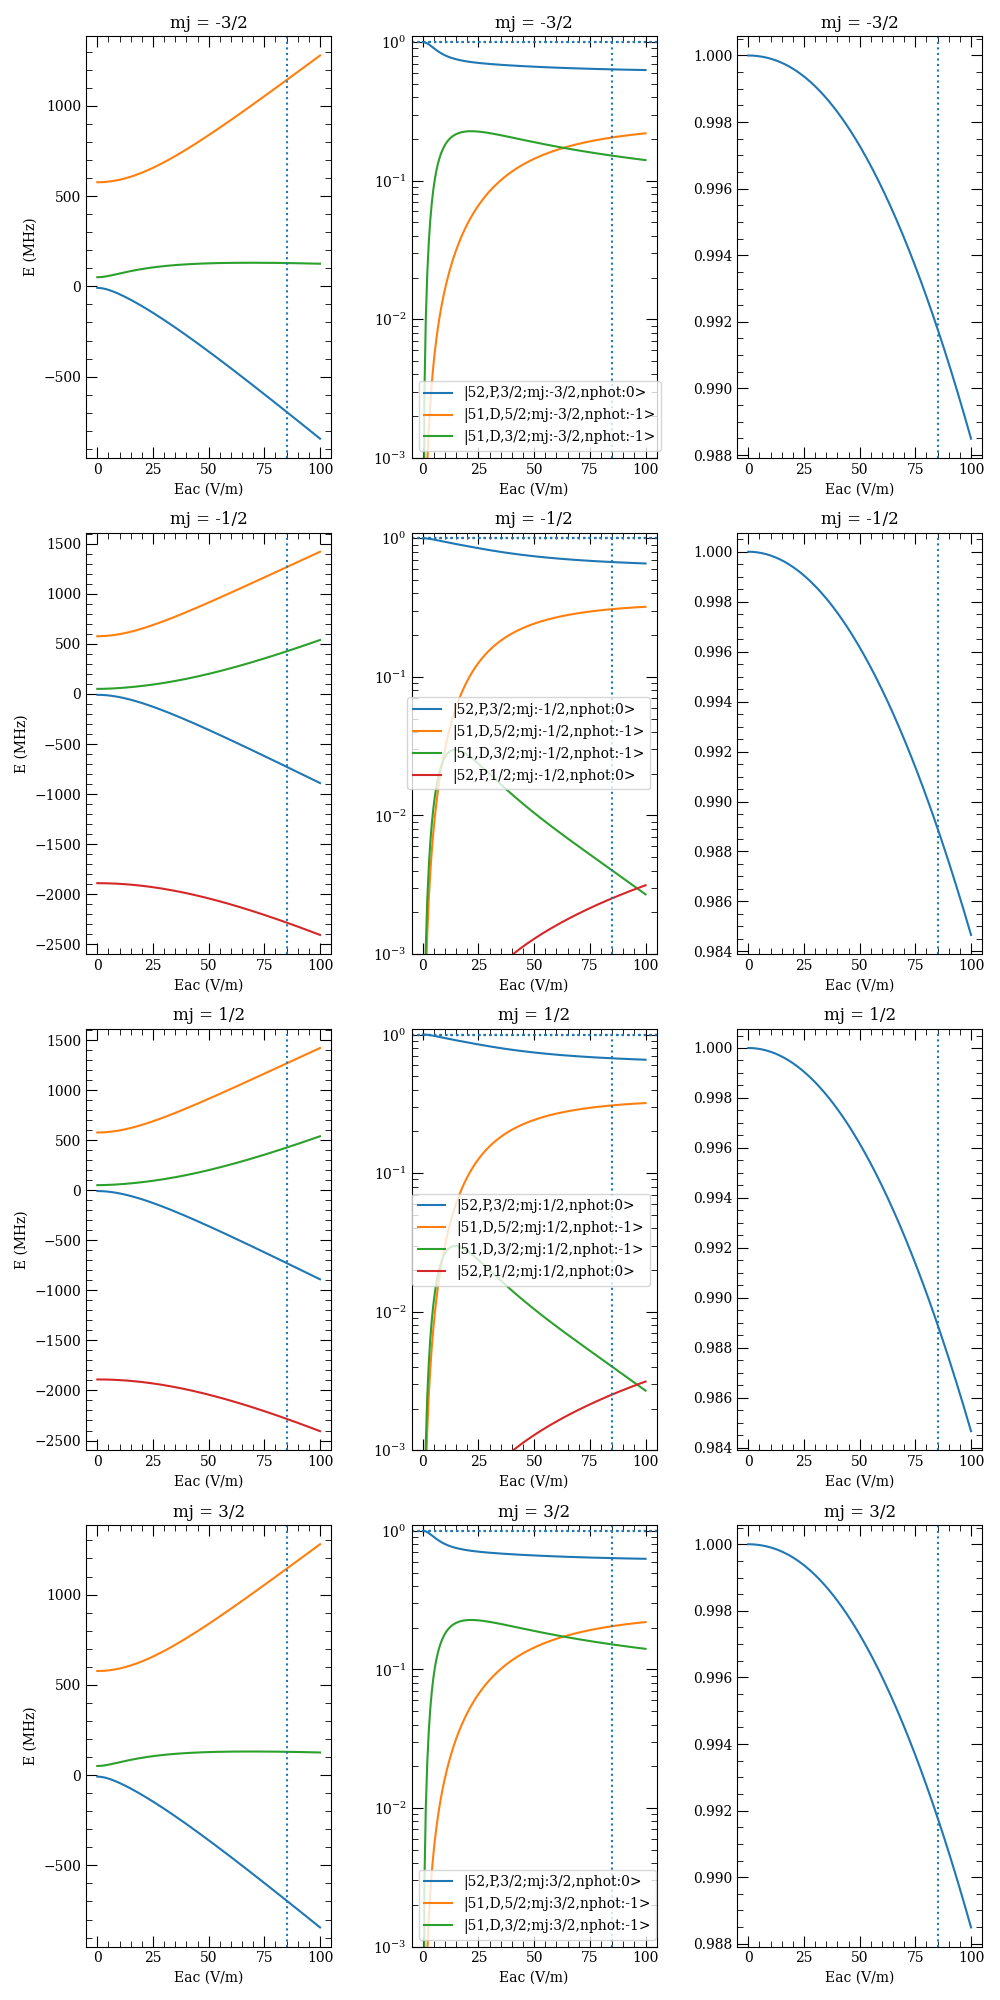

In [47]:
t_level=RydStateFS(52,1,3/2)
t_inds = [ind for ind,state in enumerate(basis) if [state.n,state.l,state.j] == [t_level.n, t_level.l, t_level.j]]

m_level = RydStateFS(51,2,5/2)
m2_level = RydStateFS(51,2,3/2)
m3_level = RydStateFS(52,1,1/2)
m_inds = [ind for ind,state in enumerate(basis) if [state.n,state.l,state.j] == [m_level.n, m_level.l, m_level.j]]
m_inds += [ind for ind,state in enumerate(basis) if [state.n,state.l,state.j] == [m2_level.n, m2_level.l, m2_level.j]]

p_inds = [ind for ind,state in enumerate(basis) if [state.n,state.l,state.j] == [m3_level.n, m3_level.l, m3_level.j]]

ms = np.arange(-t_level.j,t_level.j+1,1)
fig,axar = plt.subplots(len(ms),3,figsize=(10,5*len(ms)))

th = 1e-3
#for i in m_inds+len(basis)*(n_max-1):
#    axar[0].plot(varied[1],energies[i,:]*1e-6/tau)
llabs = {0:"S",1:"P",2:"D",3:"F"}

for i,t_i in enumerate(t_inds):
    ii = t_i+n_max*len(basis)
    ax = axar[i,0]
    #ax.plot(varied[1],energies[ii,:]*1e-6/tau)
    ax.set_title(f"mj = {int(2*ms[i])}/2")
    ax.set_xlabel(f"{varied[0]} (V/m)")
    ax.set_ylabel(f"E (MHz)")

    mt_inds = [k+n_max*len(basis) for k in t_inds]+[k+(n_max-1)*len(basis) for k in m_inds]+[k+n_max*(len(basis)) for k in p_inds]
    mt_inds += [k+(n_max-2)*(len(basis)) for k in p_inds]
    mt_inds += [k+(n_max+2)*(len(basis)) for k in p_inds]
    for k in mt_inds:
        if any(eigenstates[ii,k,:]**2>th):
            ax.plot(varied[1],energies[k,:]*1e-6/tau)
    
    ax=axar[i,1]
    for k in mt_inds:
        st = basis_n[k]
        lab = f"|{st.n},{llabs[st.l]},{int(2*st.j)}/2,{int(2*st['mj'])}/2>"
        lab = basis_n[k].ket()
        if any(eigenstates[ii,k,:]**2>th):
            ax.plot(varied[1],np.abs(eigenstates[ii,k,:])**2,label=lab)
            ax.axhline(1,ls=":")
    ax.set_title(f"mj = {int(2*ms[i])}/2")
    ax.set_xlabel(f"{varied[0]} (V/m)")
    #ax.set_ylabel(f"E (MHz)")
    ax.set_yscale("log")
    ax.set_ylim(th,1.1)
    ax.legend()
    
    ax=axar[i,2]
    s=np.zeros(energies[0].shape,dtype=float)
    for k in mt_inds:
        if any(eigenstates[ii,k,:]**2>th):
            s+= np.abs(eigenstates[ii,k,:])**2
    ax.plot(varied[1],s)
    ax.set_title(f"mj = {int(2*ms[i])}/2")
    ax.set_xlabel(f"{varied[0]} (V/m)")
    #ax.set_ylabel(f"E (MHz)")
    #ax.legend()
    
    for ax in axar[i,:]:
        ax.axvline(85,ls=":")
fig.tight_layout()
fig.show()

<IPython.core.display.Javascript object>


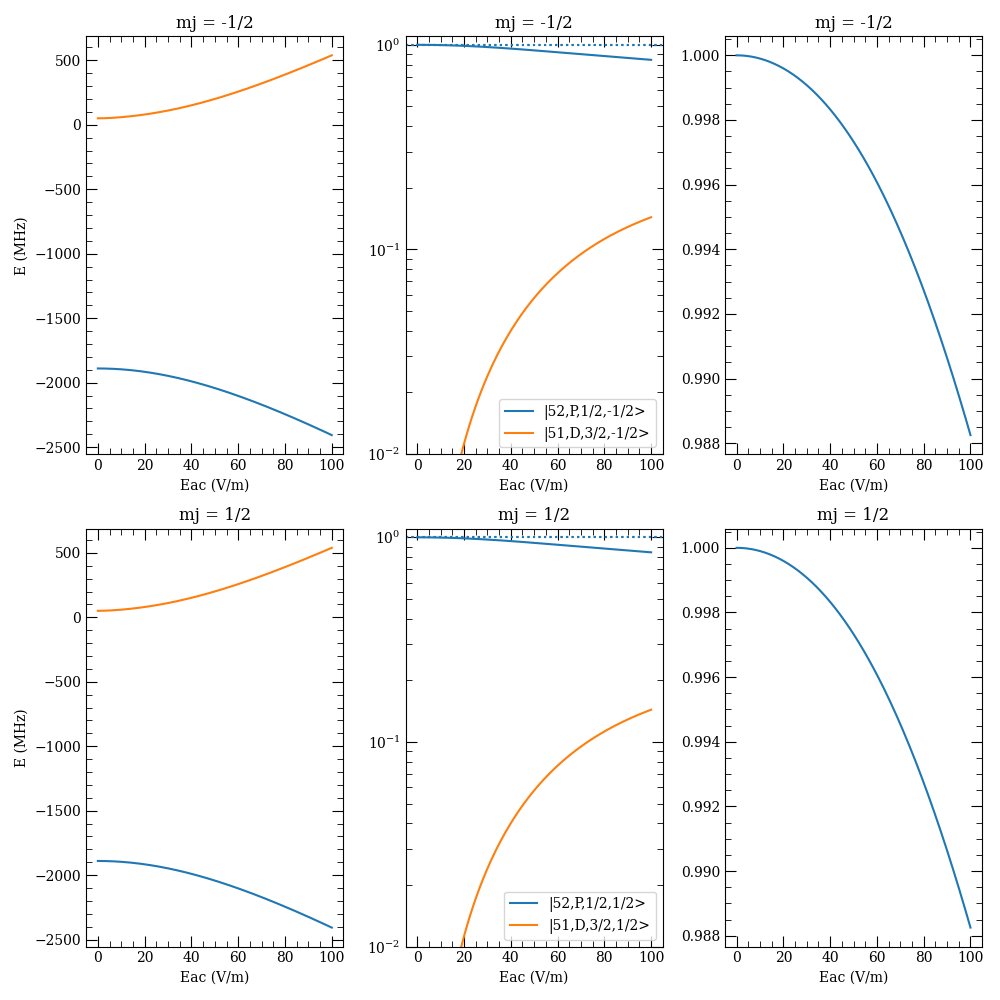

In [42]:
t_level=RydStateFS(52,1,1/2)
t_inds = [ind for ind,state in enumerate(basis) if [state.n,state.l,state.j] == [t_level.n, t_level.l, t_level.j]]
m_level = RydStateFS(51,2,5/2)
m2_level = RydStateFS(51,2,3/2)
m_inds = [ind for ind,state in enumerate(basis) if [state.n,state.l,state.j] == [m_level.n, m_level.l, m_level.j]]
m_inds += [ind for ind,state in enumerate(basis) if [state.n,state.l,state.j] == [m2_level.n, m2_level.l, m2_level.j]]

ms = np.arange(-t_level.j,t_level.j+1,1)
fig,axar = plt.subplots(len(ms),3,figsize=(10,5*len(ms)))

th = 1e-2
#for i in m_inds+len(basis)*(n_max-1):
#    axar[0].plot(varied[1],energies[i,:]*1e-6/tau)
llabs = {0:"S",1:"P",2:"D",3:"F"}

for i,t_i in enumerate(t_inds):
    ii = t_i+n_max*len(basis)
    ax = axar[i,0]
    #ax.plot(varied[1],energies[ii,:]*1e-6/tau)
    ax.set_title(f"mj = {int(2*ms[i])}/2")
    ax.set_xlabel(f"{varied[0]} (V/m)")
    ax.set_ylabel(f"E (MHz)")

    mt_inds = [k+n_max*len(basis) for k in t_inds]+[k+(n_max-1)*len(basis) for k in m_inds]
    for k in mt_inds:
        if any(eigenstates[ii,k,:]**2>th):
            ax.plot(varied[1],energies[k,:]*1e-6/tau)
    
    ax=axar[i,1]
    for k in mt_inds:
        st = basis_n[k]
        lab = f"|{st.n},{llabs[st.l]},{int(2*st.j)}/2,{int(2*st['mj'])}/2>"
        if any(eigenstates[ii,k,:]**2>th):
            ax.plot(varied[1],np.abs(eigenstates[ii,k,:])**2,label=lab)
            ax.axhline(1,ls=":")
    ax.set_title(f"mj = {int(2*ms[i])}/2")
    ax.set_xlabel(f"{varied[0]} (V/m)")
    #ax.set_ylabel(f"E (MHz)")
    ax.set_yscale("log")
    ax.set_ylim(th,1.1)
    ax.legend()
    
    ax=axar[i,2]
    s=np.zeros(energies[0].shape,dtype=float)
    for k in mt_inds:
        if any(eigenstates[ii,k,:]**2>th):
            s+= np.abs(eigenstates[ii,k,:])**2
    ax.plot(varied[1],s)
    ax.set_title(f"mj = {int(2*ms[i])}/2")
    ax.set_xlabel(f"{varied[0]} (V/m)")
    #ax.set_ylabel(f"E (MHz)")
    #ax.legend()
    
fig.tight_layout()
fig.show()

In [11]:
ind = 85
fields[varied[0]] = fields_p[varied[0]][ind]
HF = build_floquet(basis,H0,n_max=n_max,**fields)
c_mat = eigenstates[...,ind]
HF_d = np.dot(c_mat,np.dot(HF,c_mat.T))
#es_dot = np.dot(eigenstates[...,1].T,np.dot(build_floquet(basis,H0,varied[1][1],0,field_omega,0,0,n_max),eigenstates[...,1]))

dipoles_Z built in 0.2804410457611084
little_d built in 0.012965917587280273
Hdc built in 0.0009989738464355469
dipoles_ac built in 0.2654707431793213
Hfloquet put together in 0.0009646415710449219


In [12]:
HF_d = np.dot(c_mat,np.dot(HF,c_mat.T))

In [13]:
print(np.max((HF_d-np.diag(energies[...,ind]))))
nds=np.argmax((HF_d-np.diag(energies[...,ind])))
max_inds = (nds//len(basis_n),nds%len(basis_n))
print(HF_d[max_inds])

(17868.16489439955+0j)
(17868.16489439955+0j)


In [18]:
np.max(np.dot(c_mat,c_mat.T)-np.diag(np.diag(np.dot(c_mat,c_mat.T))))

(1.1876949626893453e-07+0j)

In [106]:
HF_d[56875//240,56875%240]

(-11502.744551496779+0j)

In [113]:
np.max(HF-np.diag(np.diag(HF)))*1e-6
nds =np.argmax(HF-np.diag(np.diag(HF)))
max_inds=(nds//len(basis_n),nds%len(basis_n))

In [32]:
t_ind
    eigenstates[k,:,ind].T,eigenstates[k,:,ind]

IndentationError: unexpected indent (<ipython-input-32-7f7a365600f1>, line 2)

In [35]:
t_inds

[18, 19, 20, 21]

In [36]:
k1 = 16+len()
k2 = 19

In [37]:
print(basis[k1].ket(),basis[k2].ket())

|52,P,1/2;mj:-1/2> |52,P,3/2;mj:-1/2>
